In [25]:
import pandas as pd
import numpy as np

df = pd.read_csv("positions_of_robot_and_human.csv")
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     31 non-null     int64  
 1   human_x  31 non-null     float64
 2   human_y  31 non-null     float64
 3   robot_x  31 non-null     float64
 4   robot_y  31 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.3 KB


(None,
    time  human_x  human_y  robot_x  robot_y
 0     0     1.50      1.5      1.5      0.5
 1     2     1.50      2.5      1.5      1.0
 2     4     2.50      3.5      2.0      2.5
 3     6     3.25      4.5      2.0      2.5
 4     8     3.75      4.5      2.0      3.0)

In [26]:
df["distance"] = np.sqrt(
    (df["robot_x"] - df["human_x"]) ** 2 + (df["robot_y"] - df["human_y"]) ** 2
)
avg_distance = df["distance"].mean()
max_distance = df["distance"].max()
min_distance = df["distance"].min()
std_distance = df["distance"].std()
print(f"Average Distance: {avg_distance*60.96:.2f}cm, Max Distance: {max_distance*60.96:.2f}cm, Min Distance: {min_distance*60.96:.2f}cm, Distance Variance/Standard Deviation: {std_distance*60.96:.2f}cm,")


Average Distance: 187.21cm, Max Distance: 278.10cm, Min Distance: 60.96cm, Distance Variance/Standard Deviation: 68.10cm,


In [20]:
# Compute velocities
df["human_vel_x"] = df["human_x"].diff() / df["time"].diff()
df["human_vel_y"] = df["human_y"].diff() / df["time"].diff()
df["robot_vel_x"] = df["robot_x"].diff() / df["time"].diff()
df["robot_vel_y"] = df["robot_y"].diff() / df["time"].diff()

# Compute speeds
df["human_speed"] = np.sqrt(df["human_vel_x"] ** 2 + df["human_vel_y"] ** 2)
df["robot_speed"] = np.sqrt(df["robot_vel_x"] ** 2 + df["robot_vel_y"] ** 2)

# Compute acceleration
df["robot_acc"] = df["robot_speed"].diff() / df["time"].diff()

In [21]:
df["robot_jerk"] = df["robot_acc"].diff() / df["time"].diff()
avg_jerk = df["robot_jerk"].abs().mean()  # Average absolute jerk
print(f"Average Jerk: {avg_jerk:.2f}")

Average Jerk: 0.12


In [22]:
from scipy.signal import correlate, find_peaks

# Example: Correlation between human_x and robot_x
corr = correlate(df["human_x"], df["robot_x"], mode="full")
lags = np.arange(-len(df) + 1, len(df))
delay = lags[np.argmax(corr)] * 0.02  # Convert to seconds (0.02 = frame interval)
print(f"Time Lag: {delay:.2f} seconds")

Time Lag: 0.00 seconds


In [23]:
def path_length(x, y):
    return np.sum(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2))

human_path = path_length(df["human_x"], df["human_y"])
robot_path = path_length(df["robot_x"], df["robot_y"])
print(f"Human Path Length: {human_path*60.96:.2f}cm, Robot Path Length: {robot_path*60.96:.2f}cm")

Human Path Length: 1283.62cm, Robot Path Length: 1200.84cm


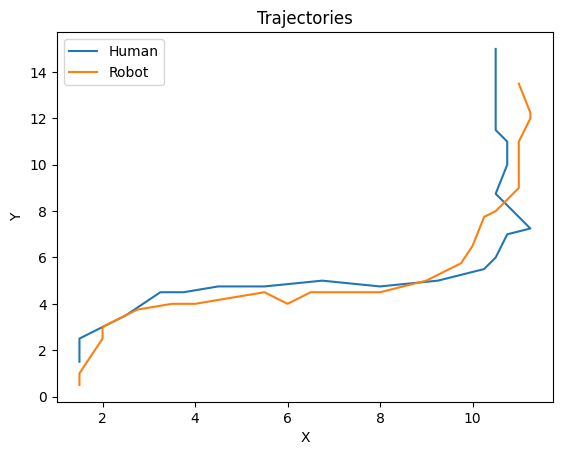

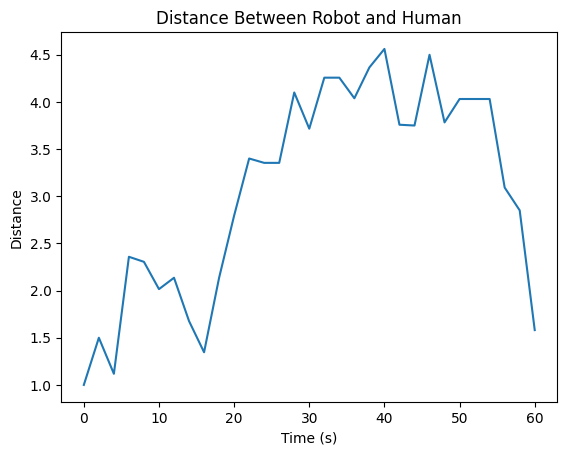

In [24]:
import matplotlib.pyplot as plt

# Trajectory plot
plt.plot(df["human_x"], df["human_y"], label="Human")
plt.plot(df["robot_x"], df["robot_y"], label="Robot")
plt.xlabel("X"), plt.ylabel("Y"), plt.legend()
plt.title("Trajectories")
plt.show()

# Distance over time
plt.plot(df["time"], df["distance"])
plt.xlabel("Time (s)"), plt.ylabel("Distance")
plt.title("Distance Between Robot and Human")
plt.show()